## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score,
)
import time

## 2. Helper Functions

In [2]:
def print_section(title):
    print("\n" + "="*80)
    print(f"  {title}") 
    print("="*80)

def evaluate_classification_model(y_true, y_pred, y_pred_proba=None, model_name=""):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
    }
    
    if y_pred_proba is not None:
        try:
            metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)
        except:
            pass
    
    return metrics

def print_metrics(metrics, model_name):
    print(f"\n{model_name} Metrics:")
    for metric_name, value in metrics.items():
        print(f"  - {metric_name}: {value:.4f}")


## 3. Load and Prepare Data

In [3]:
file_path = "dataset/processed_data.csv"

df = pd.read_csv(file_path)
print(f"  - Shape: {df.shape}")

X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"  - Class Distribution:")
print(y.value_counts())

  - Shape: (16500, 14)
  - Class Distribution:
Churn
0.0    8328
1.0    8172
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train-Test Split:")
print(f"  - Training set: {X_train.shape}")
print(f"  - Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train-Test Split:
  - Training set: (13200, 13)
  - Test set: (3300, 13)


## 4. Train Models

### 4.1 Logistic Regression

In [5]:
start_time = time.time()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

metrics_lr = evaluate_classification_model(y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
print_metrics(metrics_lr, "Logistic Regression")
print(f"  - Training Time: {time.time() - start_time:.4f} seconds")


Logistic Regression Metrics:
  - Accuracy: 0.8397
  - Precision: 0.8477
  - Recall: 0.8244
  - F1-Score: 0.8359
  - ROC-AUC: 0.8991
  - Training Time: 0.0500 seconds


### 4.2 Random Forest

In [6]:
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

metrics_rf = evaluate_classification_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")
print_metrics(metrics_rf, "Random Forest")
print(f"  - Training Time: {time.time() - start_time:.4f} seconds")


Random Forest Metrics:
  - Accuracy: 0.9115
  - Precision: 0.8635
  - Recall: 0.9755
  - F1-Score: 0.9161
  - ROC-AUC: 0.9500
  - Training Time: 0.6866 seconds


### 4.3 AdaBoost

In [7]:
start_time = time.time()

ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)[:, 1]

metrics_ab = evaluate_classification_model(y_test, y_pred_ab, y_pred_proba_ab, "AdaBoost")
print_metrics(metrics_ab, "AdaBoost")
print(f"  - Training Time: {time.time() - start_time:.4f} seconds")


AdaBoost Metrics:
  - Accuracy: 0.8661
  - Precision: 0.8811
  - Recall: 0.8433
  - F1-Score: 0.8618
  - ROC-AUC: 0.9430
  - Training Time: 2.3307 seconds


### 4.4 Support Vector Machine (SVM)

In [8]:
start_time = time.time()

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

metrics_svm = evaluate_classification_model(y_test, y_pred_svm, y_pred_proba_svm, "SVM")
print_metrics(metrics_svm, "SVM")
print(f"  - Training Time: {time.time() - start_time:.4f} seconds")


SVM Metrics:
  - Accuracy: 0.8900
  - Precision: 0.8638
  - Recall: 0.9235
  - F1-Score: 0.8926
  - ROC-AUC: 0.9361
  - Training Time: 27.8563 seconds


### 4.5 LightGBM

In [12]:
start_time = time.time()

lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

metrics_lgb = evaluate_classification_model(y_test, y_pred_lgb, y_pred_proba_lgb, "LightGBM")
print_metrics(metrics_lgb, "LightGBM")
print(f"  - Training Time: {time.time() - start_time:.4f} seconds")


LightGBM Metrics:
  - Accuracy: 0.9121
  - Precision: 0.8636
  - Recall: 0.9767
  - F1-Score: 0.9167
  - ROC-AUC: 0.9520
  - Training Time: 0.3283 seconds


## 5. Model Comparison Summary

In [10]:

results = {
    'Logistic Regression': metrics_lr,
    'Random Forest': metrics_rf,
    'AdaBoost': metrics_ab,
    'SVM': metrics_svm,
    'LightGBM': metrics_lgb
}

summary_df = pd.DataFrame(results).T
print("\nClassification Models Performance:")
print(summary_df.to_string())


Classification Models Performance:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.839697   0.847703  0.824357  0.835867  0.899135
Random Forest        0.911515   0.863489  0.975520  0.916092  0.949952
AdaBoost             0.866061   0.881074  0.843329  0.861789  0.943037
SVM                  0.890000   0.863766  0.923501  0.892635  0.936135
LightGBM             0.912121   0.863636  0.976744  0.916715  0.951968


## 6. Visualization of Model Performance

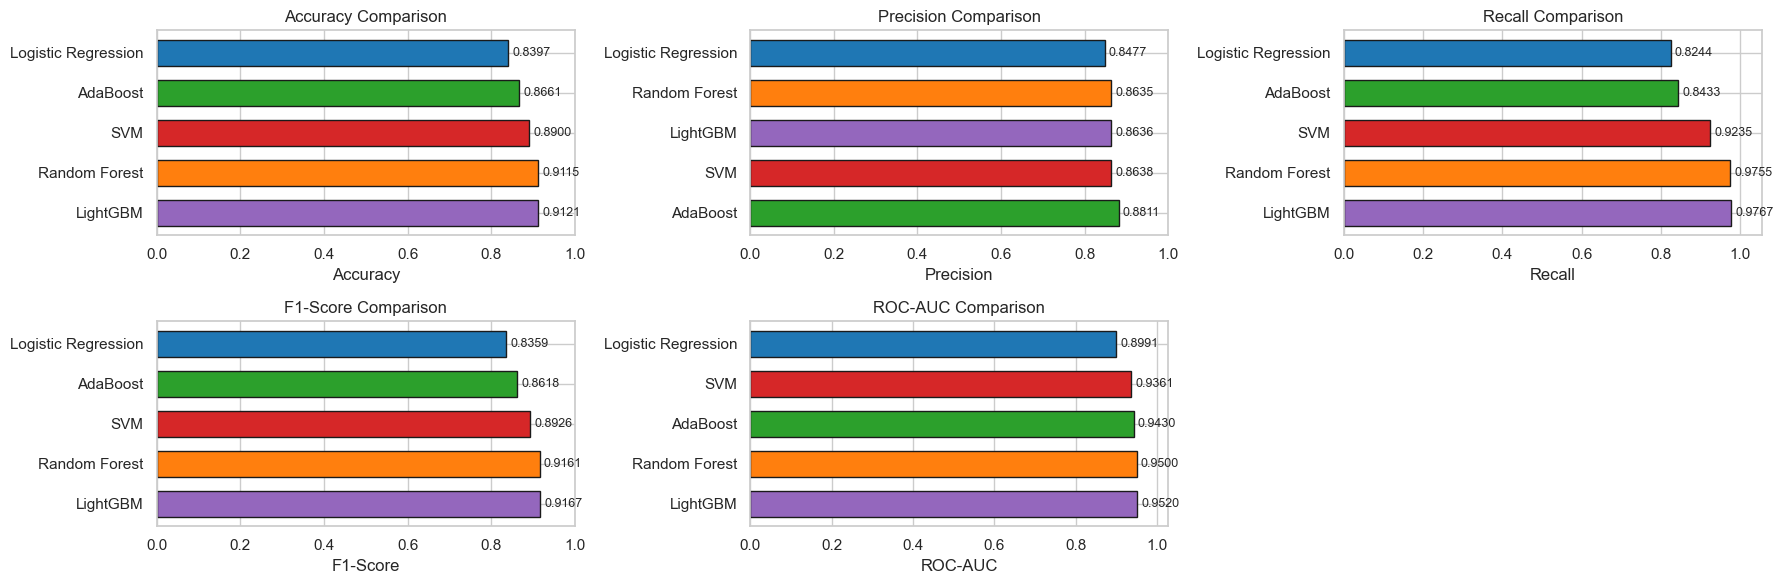

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid', context='notebook')
models = summary_df.index.tolist()
palette = dict(zip(models, sns.color_palette('tab10', n_colors=len(models))))

metrics_list = summary_df.columns.tolist()
n_metrics = len(metrics_list)
n_cols = 3
n_rows = int(np.ceil(n_metrics / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))

if n_metrics == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, metric in enumerate(metrics_list):
    ax = axes[idx]
    data = summary_df[metric].dropna().sort_values(ascending=True)
    y_pos = np.arange(len(data))
    colors = [palette.get(m, '#333333') for m in data.index]
    ax.barh(y_pos, data.values, color=colors, edgecolor='k', height=0.65)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.index)
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    xmax = max(1.0, data.max() * 1.08)
    ax.set_xlim(0, xmax)
    for i, v in enumerate(data.values):
        ax.text(v + xmax * 0.01, i, f'{v:.4f}', va='center', fontsize=9)
    ax.invert_yaxis()

for j in range(len(metrics_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()